# ch01.05. 딥러닝 다중 분류 모델
---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 이용한 멀티클래스 분류 진행
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측
    
## 학습자료

* 모두의딥러닝
* 데이터
  * `iris.csv`
  * MNIST 데이터셋


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 359, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 359 (delta 112), reused 120 (delta 78), pack-reused 178
Receiving objects: 100% (359/359), 22.36 MiB | 16.36 MiB/s, done.
Resolving deltas: 100% (147/147), done.


## 아이리스 꽃 종류 예측
---


```
- 0 sepal_length  꽃받침 길이
- 1 sepal_width 꽃받침 너비
- 2 petal_length 꽃임 길이
- 3 petal_width 꽃잎 너비
- 4 species 꽃의 종류 {setosa, versicolor virginica}
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-01.PNG?raw=true width=550>
</p>


In [4]:
data_path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
df = pd.read_csv(data_path, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'all dataset')

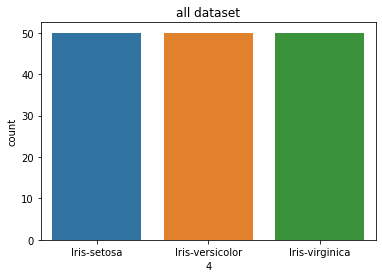

In [5]:
sns.countplot(x=df[4]);plt.title('all dataset')

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


def iris_preprocess(df):
  # x-y 분할
  x = df.values[:, :-1]
  y = df.values[:, -1]
  
  
  
  # 정규화 (x 데이터만)
  ss = StandardScaler()
  x = ss.fit_transform(x)

  

  # 원-핫 (y 데이터만)
  oh = OneHotEncoder(sparse=False)   
  y = oh.fit_transform(np.expand_dims(y, 1)) # 인풋이 무조건 행렬 y는 현재 (150, ) -> (150,1)   np.expand_dims 1위치에 디맨션 추가
  print(f'원-핫 변환 순서 : {oh.categories_}')

  # train-test 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=seed, stratify=y)
  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = iris_preprocess(df)
print(f'데이터 형태:{x_train.shape}, {x_test.shape}, {y_train.shape}, {y_test.shape}')
print(f'첫번째 샘플 x:{x_train[0]}, y:{y_train[0]}')

원-핫 변환 순서 : [array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]
데이터 형태:(105, 4), (45, 4), (105, 3), (45, 3)
첫번째 샘플 x:[ 0.55333328 -0.58776353  0.76275864  0.39617188], y:[0. 0. 1.]


* 예측값 분포 확인

Text(0.5, 1.0, 'test dataset')

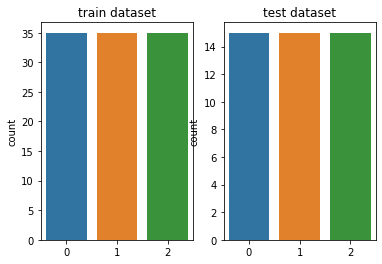

In [16]:
plt.subplot(121);sns.countplot(x=np.argmax(y_train, axis=1));plt.title('train dataset')
plt.subplot(122);sns.countplot(x=np.argmax(y_test, axis=1));plt.title('test dataset')

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-02.PNG?raw=true width=800>
</p>


#### **모델 생성**

In [17]:
from tensorflow.keras import models, layers, utils

def build_model():
  x = layers.Input(4)
  z = layers.Dense(12, activation='relu')(x)
  z = layers.Dense(8, activation='relu')(z)
  y = layers.Dense(3, activation='softmax')(z) 
  model = models.Model(x, y)
  return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 12)                60        
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


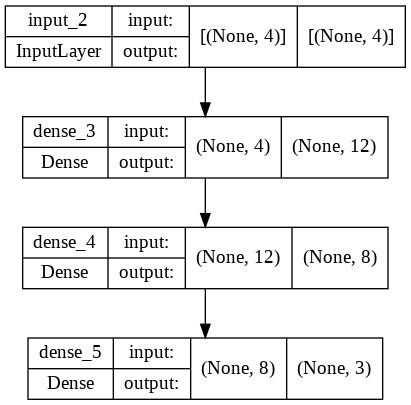

In [18]:
model = build_model()
model.summary()
utils.plot_model(model, show_shapes=True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 다중분류 문제, 'categorical_crossentropy'
* `optimizer` : 문제와 상관없음 'adam'
* `metrics`: accuracy (정확도)


In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=8)

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [22]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.1181 - accuracy: 0.9778


[0.1180812418460846, 0.9777777791023254]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [25]:
y_pred = model.predict(x_test)
print(y_test.shape, y_pred.shape)
print(y_test[0], y_pred[0])

# 원핫 - > 라벨
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(y_test.shape, y_pred.shape)
print(y_test[0], y_pred[0])

(45, 3) (45, 3)
[1. 0. 0.] [9.9971539e-01 2.8422585e-04 3.0232277e-07]
(45,) (45,)
0 0


* 예측 시각화

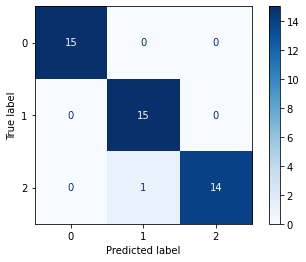

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

## 과제
---

### | 과제1. 다중분류 문제 정리

* 예측값의 범위 : 0-2
* 예측값의 shape : (45,3) -> (45,)
* 아웃풋 레이어의 노드 개수 : 3
* 아웃풋 레이어의 activation : softmax
* 손실함수 (loss) : categorical_crossentropy
* 평가함수 (metrics) : accuracy

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data_path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
df = pd.read_csv(data_path, header=None)

def iris_preprocess(df):
  x = df.values[:, :-1]
  y = df.values[:, -1]
  ss = StandardScaler()
  x = ss.fit_transform(x)
  oh = OneHotEncoder(sparse=False)   
  y = oh.fit_transform(np.expand_dims(y, 1))
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=seed, stratify=y)
  return x_train, x_test, y_train, y_test

def build_model():
  x = layers.Input(4)
  z = layers.Dense(12, activation='relu')(x)
  z = layers.Dense(8, activation='relu')(z)
  y = layers.Dense(3, activation='softmax')(z) 
  model = models.Model(x, y)
  return model

x_train, x_test, y_train, y_test = iris_preprocess(df)
model = build_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=8)
model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

### | 과제 3. MNIST 숫자 데이터 분류

```
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
```

In [58]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 정규화 (x)
x_train = x_train/255. # (0~1)
x_test = x_test/255. 
# 원핫(y) -> 안하고 작동시켜보기
print(f'데이터 형태:{x_train.shape}, {x_test.shape}, {y_train.shape}, {y_test.shape}')
print(f'첫번째 샘플 x:{x_train[0]}, y:{y_train[0]}')

데이터 형태:(60000, 28, 28), (10000, 28, 28), (60000,), (10000,)
첫번째 샘플 x:[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.      

* 데이터 시각화

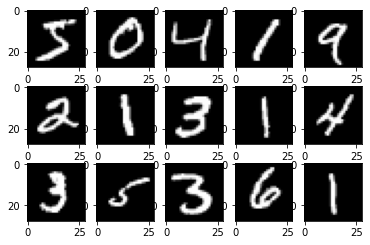

In [59]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(x_train[i], cmap='gray')

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-03.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [84]:
from tensorflow.keras import models, layers, utils

def build_mnistmodel():
  x= layers.Input(shape=(28,28))
  y = layers.Flatten()(x)
  y = layers.Dense(1000, activation='relu')(y)
  y = layers.Dense(500, activation='relu')(y)
  y = layers.Dense(100, activation='relu')(y)
  y = layers.Dense(10, activation='softmax')(y)
  model = models.Model(x, y)
  return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 1000)              785000    
                                                                 
 dense_16 (Dense)            (None, 500)               500500    
                                                                 
 dense_17 (Dense)            (None, 100)               50100     
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 1,336,610
Trainable params: 1,336,610
Non-tra

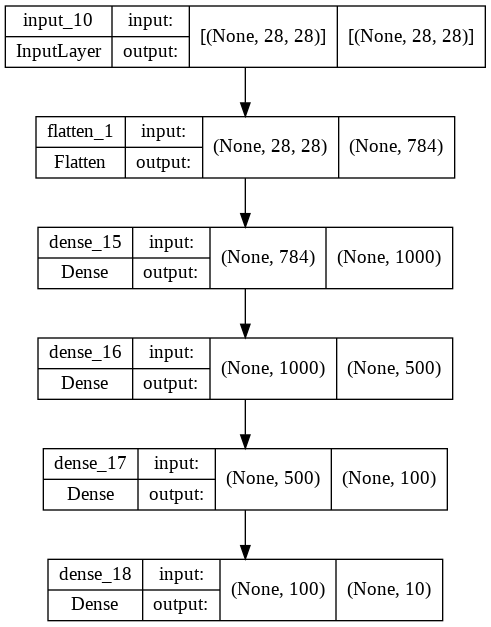

In [85]:
model = build_mnistmodel()
model.summary()
utils.plot_model(model, show_shapes=True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 다중분류 문제
  * categorical_crossentropy: 원핫 완료된 상태
  * sparse_categorical_crossentropy: 원핫 안된상태
* `optimizer` : adam
* `metrics`: 


In [86]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [87]:
model.fit(x_train, y_train, epochs=10, batch_size=8)

Epoch 1/10
7500/7500 [==============================] - 19s 2ms/step - loss: 0.2112 - accuracy: 0.9381
Epoch 2/10
7500/7500 [==============================] - 19s 3ms/step - loss: 0.1065 - accuracy: 0.9693
Epoch 3/10
7500/7500 [==============================] - 24s 3ms/step - loss: 0.0869 - accuracy: 0.9759
Epoch 4/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.0714 - accuracy: 0.9802
Epoch 5/10
7500/7500 [==============================] - 20s 3ms/step - loss: 0.0619 - accuracy: 0.9830
Epoch 6/10
7500/7500 [==============================] - 19s 2ms/step - loss: 0.0541 - accuracy: 0.9862
Epoch 7/10
7500/7500 [==============================] - 19s 2ms/step - loss: 0.0496 - accuracy: 0.9875
Epoch 8/10
7500/7500 [==============================] - 19s 3ms/step - loss: 0.0461 - accuracy: 0.9885
Epoch 9/10
7500/7500 [==============================] - 19s 2ms/step - loss: 0.0443 - accuracy: 0.9890
Epoch 10/10
7500/7500 [==============================] - 19s 2ms/step - l

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [88]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1891 - accuracy: 0.9721


[0.18912287056446075, 0.972100019454956]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [92]:
y_pred = model.predict(x_test)
print(y_pred[0])
y_pred = np.argmax(y_pred, axis=1)
print(y_pred[0])

[0.0000000e+00 9.6733642e-20 3.8507994e-17 2.5709657e-17 5.3423108e-13
 1.8331674e-29 0.0000000e+00 1.0000000e+00 1.3773935e-25 3.4658745e-09]
7


* 예측 시각화

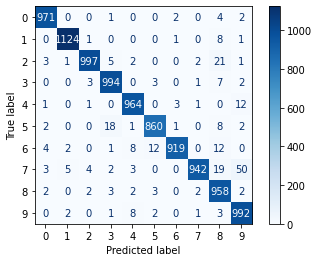

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

* 모델 활용